In [39]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("HP_engine.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5766,Honda,HR-V,2017,regular unleaded,141.0,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,31,27,2202,21465
2559,Honda,Civic,2015,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,39,30,2202,19290
1650,Lincoln,Aviator,2003,premium unleaded (required),302.0,8.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,4dr SUV,17,12,61,45125
8913,Audi,S6,2015,premium unleaded (required),420.0,8.0,AUTOMATED_MANUAL,all wheel drive,4.0,"Factory Tuner,Luxury,High-Performance",Midsize,Sedan,27,17,3105,75500
6647,Dodge,Magnum,2008,regular unleaded,250.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Wagon,22,15,1851,29855


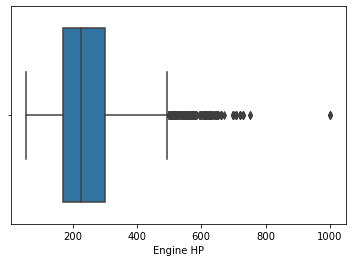

In [3]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [31]:
import numpy as np 

s = [-3, 1,2, 3,3,3,3,3,3,3,3,3,3,3.5,3.5,3.5, 3.5, 4,4,4,4,4,4,4,4,4,4,5,5,5,5,10]
s_a = np.asarray(s)

length = len(s)
media = s_a.mean()
std = s_a.std()
mediana = np.median(s_a)

print("media:", s_a.mean())
print("std:", s_a.std())
print("mediana:", mediana)
print("length:", length)

media: 3.5625
std: 1.8275239396516807
mediana: 3.5
length: 32


In [32]:
diferencia = abs(media - 1)
print("Diferencia con respecto a la media:\n", diferencia)

Diferencia con respecto a la media:
 2.5625


In [33]:
s_a

array([-3. ,  1. ,  2. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,
        3. ,  3. ,  3.5,  3.5,  3.5,  3.5,  4. ,  4. ,  4. ,  4. ,  4. ,
        4. ,  4. ,  4. ,  4. ,  4. ,  5. ,  5. ,  5. ,  5. , 10. ])

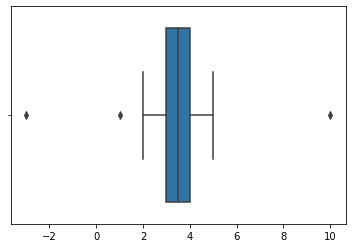

In [34]:
sns.boxplot(x=s_a)

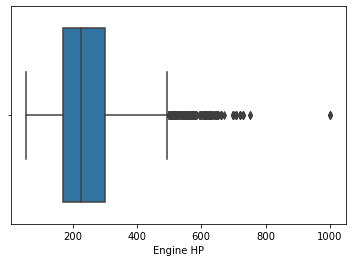

In [41]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [42]:
df["Engine HP"].quantile(0.25)

170.0

In [43]:
df["Engine HP"].quantile(0.75)

300.0

In [44]:
df["Popularity"].max()

5657

In [14]:
df["Popularity"].quantile(1)

5657.0

In [15]:
df["Popularity"].min()

2

In [16]:
df["Popularity"].quantile(0)

2.0

In [19]:
df["Popularity"].quantile(0.75)

2009.0

In [48]:
df["Popularity"].quantile(0.5)

1385.0

In [49]:
df["Popularity"].median()

1385.0

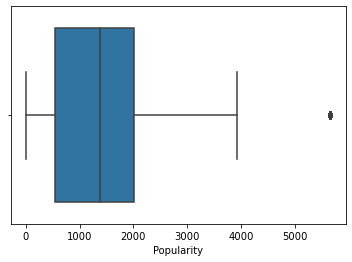

In [45]:
sns.boxplot(x=df['Popularity'])

In [46]:
df.quantile(0.25)

Year                 2007.0
Engine HP             170.0
Engine Cylinders        4.0
Number of Doors         2.0
highway MPG            22.0
city mpg               16.0
Popularity            549.0
MSRP                21000.0
Name: 0.25, dtype: float64

In [7]:
df.quantile(0.75)

Year                 2016.00
Engine HP             300.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            30.00
city mpg               22.00
Popularity           2009.00
MSRP                42231.25
Name: 0.75, dtype: float64

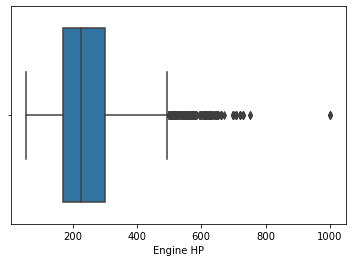

In [50]:
sns.boxplot(x=df['Engine HP'])

In [47]:
# Hard technique

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64

In [51]:
df.shape

(11914, 16)

In [52]:
IQR * 1.5

Year                   13.500
Engine HP             195.000
Engine Cylinders        3.000
Number of Doors         3.000
highway MPG            12.000
city mpg                9.000
Popularity           2190.000
MSRP                31846.875
dtype: float64

In [55]:
# Límite superior antes de outlier
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [58]:
# Límite inferior antes de outlier
(Q1 - (1.5 * IQR))

Year                 1993.500
Engine HP             -25.000
Engine Cylinders        1.000
Number of Doors        -1.000
highway MPG            10.000
city mpg                7.000
Popularity          -1641.000
MSRP               -10846.875
dtype: float64

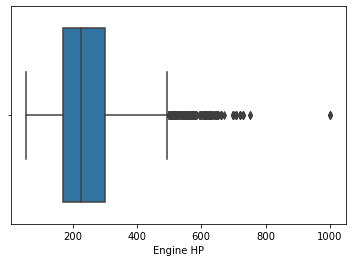

In [60]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [63]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [55]:
limite_inferior

Year                 1993.500
Engine HP             -25.000
Engine Cylinders        1.000
Number of Doors        -1.000
highway MPG            10.000
city mpg                7.000
Popularity          -1641.000
MSRP               -10846.875
dtype: float64

In [54]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR_RIC = Q3 - Q1
limite_inferior = (Q1 - 1.5 * IQR_RIC)
limite_superior = (Q3 + 1.5 * IQR_RIC)
limite_superior

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

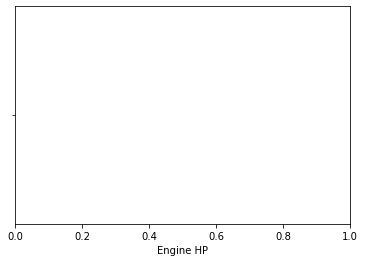

In [56]:
df3 = df[(df < limite_inferior)]
sns.boxplot(x=df3['Engine HP'])

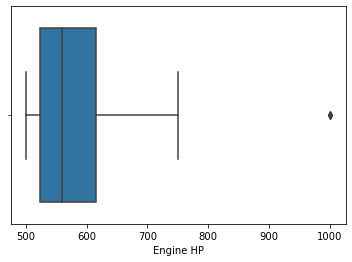

In [57]:
df4 = df[(df > limite_superior)]
sns.boxplot(x=df4['Engine HP'])

In [59]:
df2 = df[((df < limite_inferior) | (df > limite_superior)).any(axis=1)]
df2

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20,16,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,21,16,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.0,6.0,MANUAL,all wheel drive,2.0,NaN,Compact,Coupe,23,16,640,2000
11810,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,40,32,2031,17050
11903,BMW,Z8,2001,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,128000
11904,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000


In [64]:
limite_superior

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

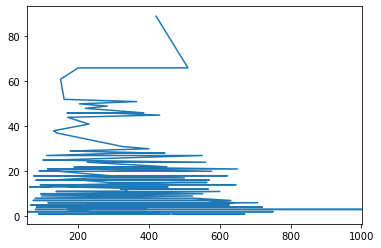

In [72]:
f = df[((df < limite_inferior) | (df > limite_superior)).any(axis=1)]["Engine HP"].value_counts()
f.plot()

valor max para engine HP 1001.0


17       172.0
18       172.0
19       172.0
20       172.0
21       172.0
         ...  
11794    145.0
11810    106.0
11903    394.0
11904    394.0
11905    394.0
Name: Engine HP, Length: 2830, dtype: float64

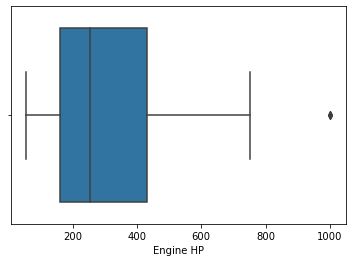

In [63]:
# Get the real rows 
# Esto está cogiendo todos los valores que están dentro de los límites superior e inferior del boxplot que representan outliers
df2 = df[((df < limite_inferior) | (df > limite_superior)).any(axis=1)]
# Valores que están fuera del rango --> Los outliers
print("valor max para engine HP", df2['Engine HP'].quantile(1))
sns.boxplot(x=df2['Engine HP'])
df2['Engine HP']

In [48]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [ ]:
#~ --> altGr + 4 y espacio
#| --> altGr + 1
# RPA: 

In [58]:
# Get the opposite --> Valores que no son outliers
df_no_outliyer = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df_no_outliyer.shape

(11914, 16)


(9084, 16)

In [87]:
df3['Engine HP'].min()

66.0

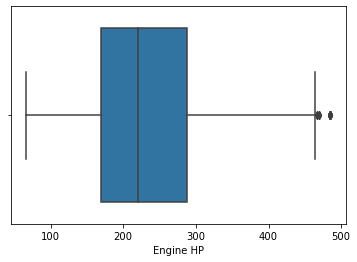

In [85]:
sns.boxplot(x=df3['Engine HP'])

Year                 2016.00
Engine HP             288.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            31.00
city mpg               22.00
Popularity           1851.00
MSRP                39408.75
Name: 0.75, dtype: float64

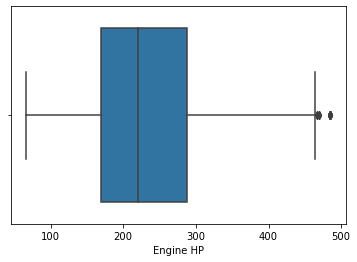

In [50]:
# Outliers After
sns.boxplot(x=df2['Engine HP'])

df2.quantile(0.75)

In [45]:
df.quantile(1)

Year                   2017.0
Engine HP              1001.0
Engine Cylinders         16.0
Number of Doors           4.0
highway MPG             354.0
city mpg                137.0
Popularity             5657.0
MSRP                2065902.0
Name: 1, dtype: float64